In [17]:
# Code adapted from:
# https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/
class Graph():
 
    # Initializes empty adjacency matrix of specified size
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist, pred):
        print("Vertex, Distance, Predecessor")
        for node in range(self.V):
            print(node, dist[node], pred[node])
 
    # Find vertex with minimum distance value from the ones we have visited
    def minDistance(self, dist, sptSet):
        min = 9999
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
        return min_index
 
    # Funtion that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [9999] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        
        pred = [9999] * self.V
        pred[src] = src

 
        # For better running time, replace this with priority queue check
        for foo in range(self.V): # We need this many iterations
            # Pick closest vertex we haven't visited yet
            u = self.minDistance(dist, sptSet)
            sptSet[u] = True # Add it to set for tree
 
            # See if there is a shorter path to anywhere through this node
            for v in range(self.V):
                # If there is an edge from u to v
                # and we have not visited v yet
                # and u provides a new shorter path to v
                if self.graph[u][v] > 0 and \
                    sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    # Update shortest known distance
                    dist[v] = dist[u] + self.graph[u][v]
                    pred[v] = u
 
        self.printSolution(dist, pred)

In [21]:
g = Graph(6)
g.graph = [[0, 7,  9, 0,  0,  14],
           [7, 0,  10, 15,  0,  0],
           [9, 10,  0, 11,  0,  2],
           [0, 15,  11, 0,  6,  2],
           [0, 0, 0, 6,  0,  9],
           [14, 0,  2, 0,  9,  0]
           ]

In [8]:
g = Graph(9)
g.graph = [[0, 4,  0, 0,  0,  0,  0, 8,  0],
           [4, 0,  8, 0,  0,  0,  0, 11, 0],
           [0, 8,  0, 7,  0,  4,  0, 0,  2],
           [0, 0,  7, 0,  9,  14, 0, 0,  0],
           [0, 0,  0, 9,  0,  10, 0, 0,  0],
           [0, 0,  4, 14, 10, 0,  2, 0,  0],
           [0, 0,  0, 0,  0,  2,  0, 1,  6],
           [8, 11, 0, 0,  0,  0,  1, 0,  7],
           [0, 0,  2, 0,  0,  0,  6, 7,  0]
           ]


In [19]:
from graphviz import Digraph
dot = Digraph()
def showgraph(adj,v):    
    for i in range(0,v):
        dot.node(str(i))
    for i in range(v):
        for conn in range(v):
            if adj[i][conn] > 0:
                dot.edge(str(i), str(conn))
    

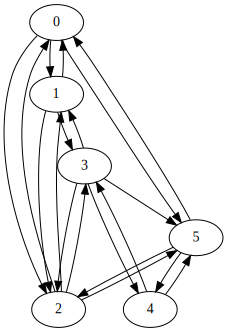

In [20]:
showgraph(g.graph, g.V)
dot

In [22]:
g.dijkstra(0)

Vertex, Distance, Predecessor
0 0 0
1 7 0
2 9 0
3 20 2
4 20 5
5 11 2
